# Nodes

From the [Interface](basic_interfaces.ipynb) tutorial, you learned that interfaces are the core pieces of Nipype that run the code of your desire. But to streamline your analysis and to execute multiple interfaces in a sensible order, you have to put them in something that we call a ``Node``.

In Nipype, a node is an object that executes a certain function. This function can be anything from a Nipype interface to a user specified function or an external script. Each node consists of a name, an interface category and at least one input field and at least one output field.

Following is a simple node from the `utility` interface, with the name `name_of_node`, the input field `IN` and the output field `OUT`:

![](../static/images/node_sinlge_node.png)

Once you connect multiple nodes to each other, you create a directed graph. In Nipype we call such graphs either workflows or pipelines. Directed connections can only be established from an output field (below `node1_out`) of a node to an input field (below `node2_in`) of another node.

![](../static/images/node_two_nodes.png)

This is all there is to Nipype. Connecting specific nodes with certain functions to other specific nodes with other functions. So let us now take a closer look at the different kind of nodes that exist and see when they should be used.

## Example of a simple node

First, let us take a look at a simple stand-alone node. In general, a node consists of the following elements:

    nodename = Nodetype(interface_function(), name='labelname')

- **nodename**: Variable name of the node in the python environment.
- **Nodetype**: Type of node to be created. This can be a `Node`, `MapNode` or `JoinNode`.
- **interface_function**: Function the node should execute. Can be user specific or coming from an `Interface`.
- **labelname**: Label name of the node in the workflow environment (defines the name of the working directory)

Let us take a look at an example: For this we need the `Node` module from Nipype, as well as the `Function` module. The second only serves a support function for this example. It isn't a prerequisite for a `Node`.

In [ ]:
# Import Node and Function module
from nipype import Node, Function

# Create a small example function
def add_two(x_input):
    return x_input + 2

# Create Node
addtwo = Node(Function(input_names=["x_input"],
                       output_names=["val_output"],
                       function=add_two),
              name='add_node')

As specified before, `addtwo` is the **nodename**, `Node` is the **Nodetype**, `Function(...)` is the **interface_function** and `add_node` is the **labelname** of the this node. In this particular case, we created an artificial input field, called `x_input`, an artificial output field called `val_output` and specified that this node should run the function `add_two()`.

But before we can run this node, we need to declare the value of the input field `x_input`:

In [ ]:
addtwo.inputs.x_input = 4

After all input fields are specified, we can run the node with `run()`:

In [ ]:
addtwo.run()

In [ ]:
temp_res = addtwo.run()

In [ ]:
temp_res.outputs

And what is the output of this node?

In [ ]:
addtwo.result.outputs

## Example of a neuroimaging node

Let's get back to the BET example from the [Interface](basic_interfaces.ipynb) tutorial. The only thing that differs from this example, is that we will put the ``BET()`` constructor inside a ``Node`` and give it a name.

In [ ]:
# Import BET from the FSL interface
from nipype.interfaces.fsl import BET

# Import the Node module
from nipype import Node

# Create Node
bet = Node(BET(frac=0.3), name='bet_node')

In the [Interface](basic_interfaces.ipynb) tutorial, we were able to specify the input file with the ``in_file`` parameter. This works exactly the same way in this case, where the interface is in a node. The only thing that we have to be careful about when we use a node is to specify where this node should be executed. This is only relevant for when we execute a node by itself, but not when we use them in a [Workflow](basic_workflow.ipynb).

In [ ]:
# Specify node inputs
bet.inputs.in_file = '/data/ds000114/sub-02/ses-test/anat/sub-02_ses-test_T1w.nii.gz'
bet.inputs.out_file = '/output/node_T1w_bet.nii.gz'

In [ ]:
res = bet.run()

As we know from the [Interface](basic_interfaces.ipynb) tutorial, the skull stripped output is stored under ``res.outputs.out_file`` (it can be also taken from ``bet.inputs.out_file``). So let's take a look at the before and the after:

In [ ]:
%pylab inline
from nilearn.plotting import plot_anat
plot_anat(bet.inputs.in_file, title='BET input', cut_coords=(10,10,10),
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False)
plot_anat(res.outputs.out_file, title='BET output', cut_coords=(10,10,10),
          display_mode='ortho',draw_cross=False, annotate=False)

#### Exercise 1a
Define a `Node` for `IsotropicSmooth` (from `fsl`). Run the node for T1 image for one of the subjects.

In [7]:
# Import the Node module
from nipype import Node
# Import IsotropicSmooth from the FSL interface
from nipype.interfaces.fsl import IsotropicSmooth

# Define a node
smooth_node = Node(IsotropicSmooth(), name="smoothing")
smooth_node.inputs.in_file = '/data/ds000114/sub-02/ses-test/anat/sub-02_ses-test_T1w.nii.gz'
smooth_node.inputs.fwhm = 4
smooth_node.inputs.out_file = '/output/node_T1w_smooth.nii.gz'
smooth_res = smooth_node.run()


171118-20:08:43,9 workflow INFO:
	 Executing node smoothing in dir: /tmp/tmppqlo0baa/smoothing
171118-20:08:43,16 workflow INFO:
	 Running node "smoothing" ("nipype.interfaces.fsl.maths.IsotropicSmooth"), a CommandLine Interface with command:
fslmaths /data/ds000114/sub-02/ses-test/anat/sub-02_ses-test_T1w.nii.gz -s 1.69864 /output/node_T1w_smooth.nii.gz.


#### Exercise 2a
Plot the original image and the image after smoothing.

In [12]:
smooth_res.outputs.out_file

'/output/node_T1w_smooth.nii.gz'

Populating the interactive namespace from numpy and matplotlib


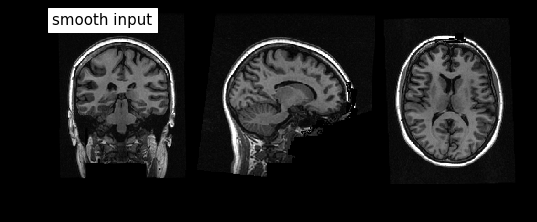

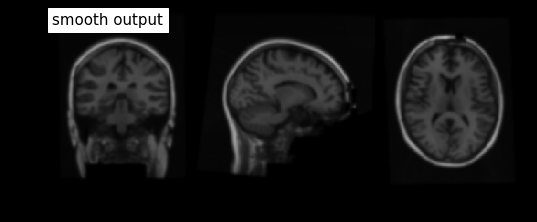

In [8]:
%pylab inline
from nilearn.plotting import plot_anat
plot_anat(smooth_node.inputs.in_file, title='smooth input', cut_coords=(10,10,10),
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False)
plot_anat(smooth_res.outputs.out_file, title='smooth output', cut_coords=(10,10,10),
          display_mode='ortho',draw_cross=False, annotate=False)